<a href="https://colab.research.google.com/github/AyusheeMittal/legendary-guide/blob/master/assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import logging
import os
import PIL

from pathlib import Path 
from scipy import io
from torchsummary import summary
from torchvision.utils import make_grid
from torch.optim.lr_scheduler import StepLR
from torchvision import transforms
from torchvision.utils import make_grid

logger=logging.getLogger() 

In [2]:
! wget https://www.robots.ox.ac.uk/~vgg/data/flowers/102/102flowers.tgz
! wget https://www.robots.ox.ac.uk/~vgg/data/flowers/102/imagelabels.mat

--2021-02-04 04:18:46--  https://www.robots.ox.ac.uk/~vgg/data/flowers/102/102flowers.tgz
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 344862509 (329M) [application/x-gzip]
Saving to: ‘102flowers.tgz’

102flowers.tgz      100%[===================>] 328.89M  28.8MB/s    in 12s     

2021-02-04 04:18:58 (27.3 MB/s) - ‘102flowers.tgz’ saved [344862509/344862509]

--2021-02-04 04:18:58--  https://www.robots.ox.ac.uk/~vgg/data/flowers/102/imagelabels.mat
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 502
Saving to: ‘imagelabels.mat’

imagelabels.mat     100%[===================>]     502  --.-KB/s    in 0s      

2021-02-04 04:18:59 (41.0 MB/s) - ‘imagelabels.mat’ saved 

In [3]:
! mkdir images

In [4]:
!tar -xvf  '102flowers.tgz' -C images

Streaming output truncated to the last 5000 lines.
jpg/image_02266.jpg
jpg/image_00062.jpg
jpg/image_05821.jpg
jpg/image_03712.jpg
jpg/image_01142.jpg
jpg/image_03033.jpg
jpg/image_05760.jpg
jpg/image_02732.jpg
jpg/image_00183.jpg
jpg/image_05264.jpg
jpg/image_03778.jpg
jpg/image_07061.jpg
jpg/image_04468.jpg
jpg/image_00676.jpg
jpg/image_07610.jpg
jpg/image_02192.jpg
jpg/image_05112.jpg
jpg/image_05638.jpg
jpg/image_00053.jpg
jpg/image_02451.jpg
jpg/image_05857.jpg
jpg/image_08033.jpg
jpg/image_03902.jpg
jpg/image_07494.jpg
jpg/image_02357.jpg
jpg/image_05496.jpg
jpg/image_04496.jpg
jpg/image_07538.jpg
jpg/image_01801.jpg
jpg/image_00326.jpg
jpg/image_07644.jpg
jpg/image_01199.jpg
jpg/image_01168.jpg
jpg/image_07020.jpg
jpg/image_05006.jpg
jpg/image_03484.jpg
jpg/image_02825.jpg
jpg/image_04549.jpg
jpg/image_02011.jpg
jpg/image_04360.jpg
jpg/image_06847.jpg
jpg/image_07695.jpg
jpg/image_03540.jpg
jpg/image_08058.jpg
jpg/image_01230.jpg
jpg/image_00096.jpg
jpg/image_01517.jpg
jpg/image

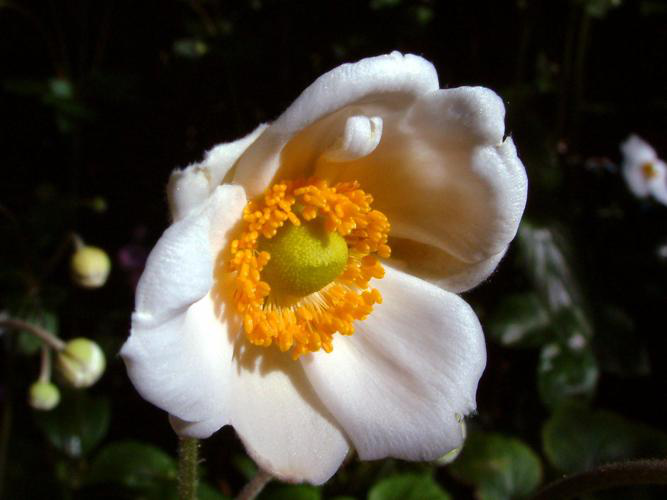

In [5]:
image = PIL.Image.open('images/jpg/image_08189.jpg')
image

In [6]:
labels = io.loadmat('imagelabels.mat')
labels

{'__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: GLNX86, Created on: Thu Feb 19 15:43:33 2009',
 '__version__': '1.0',
 'labels': array([[77, 77, 77, ..., 62, 62, 62]], dtype=uint8)}

In [7]:
labels['labels'][0].size

8189

In [8]:
type(labels['labels'][0])

numpy.ndarray

In [9]:
labels['labels'][0]

array([77, 77, 77, ..., 62, 62, 62], dtype=uint8)

In [10]:
np.unique(labels['labels'][0])

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102], dtype=uint8)

In [11]:
labels = labels['labels'][0] 

In [12]:
cat_to_name = {21: "fire lily", 3: "canterbury bells", 45: "bolero deep blue", 1: "pink primrose", 
               34: "mexican aster", 27: "prince of wales feathers", 7: "moon orchid", 16: "globe-flower", 
               25: "grape hyacinth", 26: "corn poppy", 79: "toad lily", 39: "siam tulip", 
               24: "red ginger", 67: "spring crocus", 35: "alpine sea holly", 32: "garden phlox", 
               10: "globe thistle", 6: "tiger lily", 93: "ball moss", 33: "love in the mist", 
               9: "monkshood", 102: "blackberry lily", 14: "spear thistle", 19: "balloon flower", 
               100: "blanket flower", 13: "king protea", 49: "oxeye daisy", 15: "yellow iris", 
               61: "cautleya spicata", 31: "carnation", 64: "silverbush", 68: "bearded iris", 
               63: "black-eyed susan", 69: "windflower", 62: "japanese anemone", 20: "giant white arum lily", 
               38: "great masterwort", 4: "sweet pea", 86: "tree mallow", 101: "trumpet creeper", 
               42: "daffodil", 22: "pincushion flower", 2: "hard-leaved pocket orchid", 54: "sunflower", 
               66: "osteospermum", 70: "tree poppy", 85: "desert-rose", 99: "bromelia", 87: "magnolia", 
               5: "english marigold", 92: "bee balm", 28: "stemless gentian", 97: "mallow", 57: "gaura", 
               40: "lenten rose", 47: "marigold", 59: "orange dahlia", 48: "buttercup", 
               55: "pelargonium", 36: "ruby-lipped cattleya", 91: "hippeastrum", 29: "artichoke", 
               71: "gazania", 90: "canna lily", 18: "peruvian lily", 98: "mexican petunia", 
               8: "bird of paradise", 30: "sweet william", 17: "purple coneflower", 52: "wild pansy", 
               84: "columbine", 12: "colt's foot", 11: "snapdragon", 96: "camellia", 
               23: "fritillary", 50: "common dandelion", 44: "poinsettia", 53: "primula", 
               72: "azalea", 65: "californian poppy", 80: "anthurium", 76: "morning glory", 
               37: "cape flower", 56: "bishop of llandaff", 60: "pink-yellow dahlia", 82: "clematis", 
               58: "geranium", 75: "thorn apple", 41: "barbeton daisy", 95: "bougainvillea", 
               43: "sword lily", 83: "hibiscus", 78: "lotus lotus", 88: "cyclamen", 
               94: "foxglove", 81: "frangipani", 74: "rose", 89: "watercress", 
               73: "water lily", 46: "wallflower", 77: "passion flower", 51: "petunia"}

In [13]:
values = []
for i in range(0, 8189):
  values.append(cat_to_name.get(labels[i]))

values

['passion flower',
 'passion flower',
 'passion flower',
 'passion flower',
 'passion flower',
 'passion flower',
 'passion flower',
 'passion flower',
 'passion flower',
 'passion flower',
 'passion flower',
 'passion flower',
 'passion flower',
 'passion flower',
 'passion flower',
 'passion flower',
 'passion flower',
 'passion flower',
 'passion flower',
 'passion flower',
 'passion flower',
 'passion flower',
 'passion flower',
 'passion flower',
 'passion flower',
 'passion flower',
 'passion flower',
 'passion flower',
 'passion flower',
 'passion flower',
 'passion flower',
 'passion flower',
 'passion flower',
 'passion flower',
 'passion flower',
 'passion flower',
 'passion flower',
 'passion flower',
 'passion flower',
 'passion flower',
 'passion flower',
 'passion flower',
 'passion flower',
 'passion flower',
 'passion flower',
 'passion flower',
 'passion flower',
 'passion flower',
 'passion flower',
 'passion flower',
 'passion flower',
 'passion flower',
 'passion fl

In [14]:
def show_model_summary(model, input_size):
    result = summary(model, input_size=input_size)
    print(result)

In [15]:
IS_CUDA = torch.cuda.is_available()
DEVICE = torch.device("cuda" if IS_CUDA else "cpu")

# Constants, put in config
epochs = 10
cuda_batch_size=128
cpu_batch_size = 4
num_workers = 4

model = torchvision.models.resnet34(pretrained=True, progress=True)

#for param in model.parameters():
    #param.requires_grad = False

in_features = model.fc.in_features
model.fc = nn.Linear(in_features, 102)
model = model.to(DEVICE)

show_model_summary(model, (3, 32, 32))

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth



----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 16, 16]           9,408
       BatchNorm2d-2           [-1, 64, 16, 16]             128
              ReLU-3           [-1, 64, 16, 16]               0
         MaxPool2d-4             [-1, 64, 8, 8]               0
            Conv2d-5             [-1, 64, 8, 8]          36,864
       BatchNorm2d-6             [-1, 64, 8, 8]             128
              ReLU-7             [-1, 64, 8, 8]               0
            Conv2d-8             [-1, 64, 8, 8]          36,864
       BatchNorm2d-9             [-1, 64, 8, 8]             128
             ReLU-10             [-1, 64, 8, 8]               0
       BasicBlock-11             [-1, 64, 8, 8]               0
           Conv2d-12             [-1, 64, 8, 8]          36,864
      BatchNorm2d-13             [-1, 64, 8, 8]             128
             ReLU-14             [-1, 

In [16]:
in_features

512

In [17]:
class FlowersDataset(torch.utils.data.Dataset):

    def __init__(self, root, image_dir, label_file, transform=None):
        self.root = root
        self.image_dir = image_dir
        self.image_files = os.listdir(image_dir)
        self.data = io.loadmat(label_file)['labels'][0] - 1
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        image_name = os.path.join(self.image_dir, self.image_files[index])  
        image = PIL.Image.open(image_name)
        label = int(self.data[index])
        if self.transform:
            image = self.transform(image)
        return (image, label)

In [19]:
root = Path(os.getcwd())
image_dir = root/'images/jpg'
label_file = root/'imagelabels.mat'

transform = transforms.Compose([
         transforms.Resize([225,225]),
         transforms.ToTensor(),
         #transforms.RandomHorizontalFlip(),
         transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
         ])

dset = FlowersDataset(root, image_dir, label_file, transform= transform)
train_dataset, test_dataset = torch.utils.data.random_split(dset, [6550, 1639])


dataloader_args = dict(shuffle=True, batch_size=cuda_batch_size, num_workers=num_workers, pin_memory=True) if IS_CUDA else dict(shuffle=True, batch_size=cpu_batch_size)

#train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
#test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(train_dataset, **dataloader_args)  
testloader = torch.utils.data.DataLoader(test_dataset, **dataloader_args)  

In [20]:
def imshow(img, labels):
    plt.imshow(img.permute(1,2,0))
    img = img.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    img = std * img + mean
    img = np.clip(img, 0, 1)
    #plt.title(labels + 1)
    plt.imshow(img)


torch.Size([128, 3, 225, 225]) tensor([ 78,   7,   4,  89,  37,  75,  51,  97,  63,  41,  46,  32,  54,  40,
         77, 101,  41, 102,   8,  96,  77,  17,   6,  29,  96,  40,  94,  88,
         30,  29,  34,  46, 101,  50,  75,  35,  44,  66,  61,  25,  15,  20,
         98,   8,  38,  13,  80,  58,  73,  62,   2,  81,  42,  74,  74, 101,
         68,  23,  95,  51,  76,  17,  53,  80,  90,  55,  14,  77,   4,  20,
         94,  15,   1,  77,  38,  51,  30,  47,  96,  10,  61,  50,  76,  24,
         61,  73,  47,   4,  52,  10,  26,  75,  60,  81,  51,  85,  67,  59,
         40,  51,  40,   4,  64,  82,  51,  74,  22,  88,  53,  57,  82,  75,
         25,  20,  43,  88,  48,  46,  50,  78,  27,  88,  92,  92,  81,  72,
         85,  38]) torch.Size([128])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


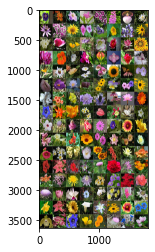

In [21]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(images.shape, labels +1 , labels.shape)
imshow(torchvision.utils.make_grid(images), labels)

In [22]:
def train_loop(epochs, trainloader, model, device, optimizer, criterion, scheduler=None, stepWithLoss=False):
    loss_accumulator = []
    acc_accumulator = []

    for epoch in range(epochs):  # loop over the dataset multiple times
        model.train()
        running_loss = 0.0
        running_corrects = 0
        processed = 0
        for i, (data, labels) in enumerate(trainloader, 0):
            # get the inputs
            inputs, labels = data.to(device), labels.to(device)

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = model(inputs)

            loss = criterion(outputs, labels)
            #print("outputs", outputs, outputs.shape)
            #print("labels", labels, labels.shape)
            #print(loss)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item() #loss.data[0]
            _, preds = torch.max(outputs, 1)
            running_corrects += torch.sum(preds == labels.data).item()
            processed += len(data)

        print('[%d, %5d] loss: %.3f' %
              (epoch + 1, i + 1, running_loss/processed))
        print("Accuracy: ", 100.0*running_corrects/processed) 

        loss_accumulator.append(running_loss/processed)
        acc_accumulator.append(100.0*running_corrects/processed)

        if scheduler:
            if stepWithLoss:
                scheduler.step(loss)
            else:
                scheduler.step()
    #return loss_accumulator, acc_accumulator

In [23]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = StepLR(optimizer, step_size=7, gamma=.1)
train_loop(epochs, trainloader, model, DEVICE, optimizer, criterion, scheduler)

[1,    52] loss: 0.037
Accuracy:  1.984732824427481
[2,    52] loss: 0.033
Accuracy:  7.068702290076335
[3,    52] loss: 0.028
Accuracy:  21.00763358778626
[4,    52] loss: 0.021
Accuracy:  47.786259541984734
[5,    52] loss: 0.012
Accuracy:  76.53435114503817
[6,    52] loss: 0.005
Accuracy:  94.19847328244275
[7,    52] loss: 0.002
Accuracy:  98.8854961832061
[8,    52] loss: 0.000
Accuracy:  99.7557251908397
[9,    52] loss: 0.000
Accuracy:  99.80152671755725
[10,    52] loss: 0.000
Accuracy:  99.8473282442748


In [26]:
def test_loop(testloader, model, device, criterion):
    correct = 0
    total = 0
    test_loss = 0
    running_loss = 0
    loss_accumulator = []
    acc_accumulator = []
    model.eval()
    with torch.no_grad():
        for data, label in testloader:
            images, labels = data.to(device), label.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            loss = criterion(outputs, labels)
            running_loss += loss.item()
            loss_accumulator.append(loss / total)
            acc_accumulator.append(100 * correct / total)
    print('Accuracy of the network on the test images: %d %%, Test loss:' % (
            100.0 * correct / total), running_loss / total)
    #return loss_accumulator, acc_accumulator
    

In [27]:
test_loop(testloader, model, DEVICE, criterion)

Accuracy of the network on the test images: 1 %, Test loss: 0.04682991750506529
